In [1]:
import numpy as np
import cPickle as pickle
from itertools import groupby
import random as random
import matplotlib.pyplot as plt
%matplotlib inline

from knn_functions import *

In [3]:
# load data
t_train = pickle.load(open('../data/visit_full.train','rb'))
t_valid = pickle.load(open('../data/visit_full.valid','rb'))
t_test = pickle.load(open('../data/visit_full.test','rb'))
training_data = t_train + t_valid + t_test

test_data = pickle.load(open('../data/test_full','rb'))

test_label = pickle.load(open('../data/test_182','rb'))
# ground truth, the last element of list 
label = map(lambda x:x[-1],test_label)

print len(training_data),len(test_data)

5076 1270


In [4]:
# optimal K
K = 40

# generate prediction
neighbor_index = getNeighbors(test_data,training_data,K)
prediction = getPrediction(training_data,neighbor_index)

In [5]:
TOP_K = [10,20,30] # prediction on TOP_K codes

# calculate accuracy
accuracy = []
for k in TOP_K:
    top_k_prediction = getTopK(prediction,k)
    accuracy.append(getAccuracy(top_k_prediction,label))
np.mean(accuracy,axis =1)

array([ 0.37607357,  0.5320602 ,  0.63202146])

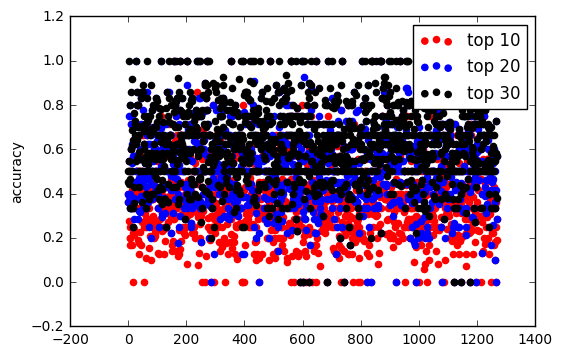

In [6]:
# distribution of accuracy
n = len(test_data)
COLOR = ['red','blue','black']
for i in range(3):
    plt.scatter(range(n),accuracy[i],color=COLOR[i])
plt.legend(['top 10','top 20','top 30'])
plt.ylabel('accuracy')

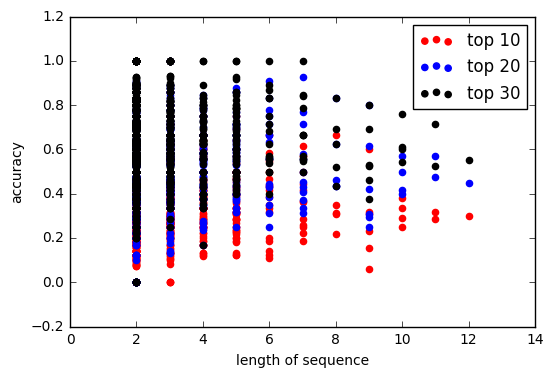

In [7]:
# distribution of accuracy vs length of sequence
length = map(len,test_data)
for i in range(3):
    plt.scatter(length,accuracy[i],color=COLOR[i])
plt.legend(['top 10','top 20','top 30'])
plt.ylabel('accuracy')
plt.xlabel('length of sequence')

In [8]:
# input: accuracy - [n*2 matrix] the first column is the length of the sample,
#                   the second column is the accuracy of prediction
#                   the matrix is ordered by length
# output: stat - [list of (length,(count,average,std))] statistics for each length
def getStatistics(accuracy):
    stat = {}
    for key,group in groupby(accuracy,lambda x:x[0]):
        l = map(lambda x:x[1],group)
        stat[int(key)] = (len(l),np.mean(l),np.std(l))
    stat = sorted(list(stat.items()),key=lambda x:x[0])
    return stat

# relationship between length of sequence and prediction accuracy
# use top 30 accuracy
length_accuracy = np.asarray([length,accuracy[2]]).T
length_accuracy = sorted(length_accuracy,key=lambda x:x[0])

stat = getStatistics(length_accuracy)
stat

[(2, (878, 0.62967939537734352, 0.18324592335501652)),
 (3, (215, 0.63767860396635279, 0.16338767230529802)),
 (4, (77, 0.62011993956376965, 0.15838362271314177)),
 (5, (53, 0.65240917547648936, 0.15399745151759456)),
 (6, (17, 0.66952571030172314, 0.16347749775105549)),
 (7, (12, 0.68349730191835467, 0.14750998863669662)),
 (8, (5, 0.62143255295429212, 0.13763352278238131)),
 (9, (6, 0.56409561800428676, 0.14200623322948847)),
 (10, (4, 0.62867063492063491, 0.081319378484358731)),
 (11, (2, 0.62030075187969924, 0.09398496240601506)),
 (12, (1, 0.55000000000000004, 0.0))]

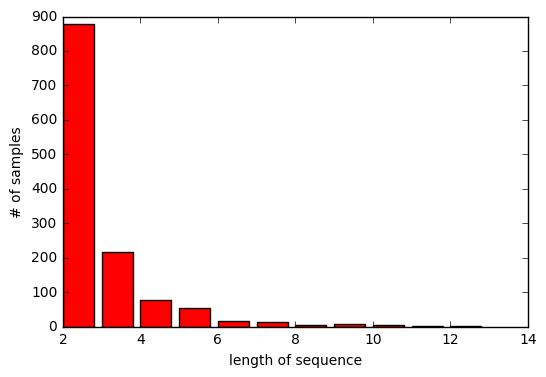

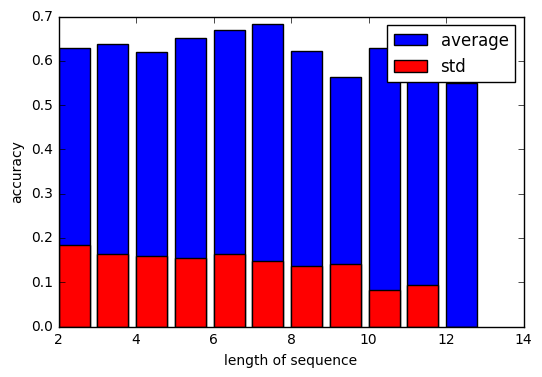

In [9]:
plt.figure()
plt.bar(map(lambda x:x[0],stat),map(lambda x:x[1][0],stat),color = 'red')
plt.xlabel('length of sequence')
plt.ylabel('# of samples')
plt.figure()
plt.bar(map(lambda x:x[0],stat),map(lambda x:x[1][1],stat),color = 'blue')
plt.bar(map(lambda x:x[0],stat),map(lambda x:x[1][2],stat),color = 'red')
plt.legend(['average','std'])
plt.xlabel('length of sequence')
plt.ylabel('accuracy')

In [11]:
file_name = open('../stat/knn','wr')
pickle.dump(('knn',stat),file_name)
file_name.close()